In [25]:
from get_repo_data import main
import plotly.express as px
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from openai import OpenAI
import os
import nbformat 
import inspect, parsons
from collections import Counter
import ast 

In [26]:
# import data
commits = pd.read_csv('data/commits.csv')
users = pd.read_csv('data/users.csv')
issues = pd.read_csv('data/issues.csv')

pass 

# Community Analytics
## Issues: User Counts

In [27]:
# Create a bar chart of the user issues counts
issues_counts = issues.value_counts(subset=['user'])

issues_counts = issues_counts.reset_index()

issues_counts.sort_values(by='count', ascending=False, inplace=True)

fig = px.bar(data_frame=issues_counts, x='user', y='count', title='Issues per User')

fig.show()

In [28]:
## Users: User Type, Counts

In [29]:
# Create a bar chart of the user type counts
users_counts = users.value_counts(subset=['type'])

users_counts = users_counts.reset_index()

users_counts.sort_values(by='count', ascending=False, inplace=True)

fig = px.bar(data_frame=users_counts, x='type', y='count', title='User Type Counts')

fig.show()

## Users: User Company, Counts (Unique)

In [30]:
# Create a bar chart of the user company counts (Unique)
# note that this grouping method assumes that the user is associated with the last company; otherwise there may be double-counting of companies
# e.g. when the same user at the same company is counted more than once

users_counts = users.groupby('login').last().value_counts(subset=['company'])

users_counts = users_counts.reset_index()

users_counts.sort_values(by='count', ascending=False, inplace=True)

fig = px.bar(data_frame=users_counts, x='company', y='count', title='User Company Counts (Unique)')

fig.show()

## Users: User Company, Counts (Not Unique)

In [31]:
# Create a bar chart of the user company counts 
# this essentially counts uses by company (?) 
users_counts = users.value_counts(subset=['company'])

users_counts = users_counts.reset_index()

users_counts.sort_values(by='count', ascending=False, inplace=True)

fig = px.bar(data_frame=users_counts, x='company', y='count', title='User Company Counts (Not Unique)')

fig.show()

## Users: User Location, Counts

In [32]:
# Create a bar chart of the user location counts
users_counts = users.value_counts(subset=['location'])

users_counts = users_counts.reset_index()

users_counts.sort_values(by='count', ascending=False, inplace=True)

fig = px.bar(data_frame=users_counts, x='location', y='count', title='User Location Counts')

fig.show()

## Users: User Bios, Counts

In [33]:
# Create a bar chart of the user bio counts
users_counts = users.value_counts(subset=['bio'])

users_counts = users_counts.reset_index()

users_counts.sort_values(by='count', ascending=False, inplace=True)

fig = px.bar(data_frame=users_counts, x='bio', y='count', title='User Bio Counts')

fig.show()

## Users: User Logins, Counts (Not Unique)

In [34]:
# Create a bar chart of the user login counts
users_counts = users.value_counts(subset=['login'])

users_counts = users_counts.reset_index()

users_counts.sort_values(by='count', ascending=False, inplace=True)

fig = px.bar(data_frame=users_counts, x='login', y='count', title='User Login Counts (Not Unique)')

fig.show()

## Commits: Author, Counts

In [35]:
commits = pd.read_csv('data/commits.csv')

author_counts = commits.value_counts(subset=['author'])

author_counts = author_counts.reset_index()

author_counts.sort_values(by='count', ascending=False, inplace=True)

fig = px.bar(data_frame=author_counts, x='author', y='count', title='Commit Author Counts')

fig.show()

# Product Analytics
## Issues: Issue Titles, Wordcloud

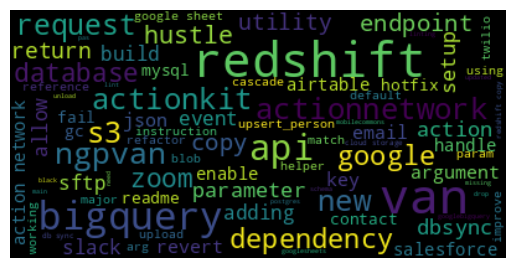

In [36]:
# generate word cloud from issue titles (https://github.com/amueller/word_cloud/blob/main/examples/simple.py)

text = ' '.join(issues['title'])

lemma = WordNetLemmatizer()
text_lemmatized = [lemma.lemmatize(w.lower()) for w in text.split()]
text = ' '.join(text_lemmatized)

stopwords = set(STOPWORDS)
stopwords.update([
    'parson','python', 'connector', 'fix', 'upsert', 'add','addition', 'update',
    'remove', 'change', 'doc', 'docs','documentation', 'table',
    'function', 'use', 'error', 'data', 'bump', 'version','type',
    'test', 'release', 'feat', 'feature', 'support','method',    
    'column','bug','code','added','file','phone','string','added',
    'name','class','list','issue','py','number','empty','github',
    'create','query','option','row','import'
])


wordcloud = WordCloud(max_font_size=40,stopwords=stopwords).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()



## Issues: Open Issues Titles, Wordcloud

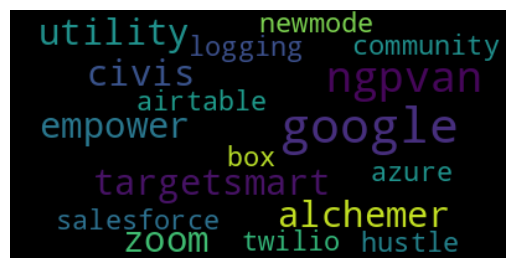

In [37]:
# word cloud of open issues

open_issues = issues[issues['state'] == 'open']

modules = [module[0] for module in inspect.getmembers(parsons, inspect.ismodule)]

text = open_issues['title'].tolist()

text = [item.lower().strip() for item in text]

norm_text = [item.split() for item in text]

flattened_list = [item for sublist in norm_text for item in sublist]

filtered_text = [item.lower().strip() for item in flattened_list if item in modules]

text = " ".join(filtered_text)

lemma = WordNetLemmatizer()
text_lemmatized = [lemma.lemmatize(w.lower()) for w in text.split()]
text = ' '.join(text_lemmatized)

stopwords = set(STOPWORDS)
stopwords.update([
    'parson','python', 'connector', 'fix', 'upsert', 'add','addition', 'update',
    'remove', 'change', 'doc', 'docs','documentation', 'table',
    'function', 'use', 'error', 'data', 'bump', 'version','type',
    'test', 'release', 'feat', 'feature', 'support','method',    
    'column','bug','code','added','file','phone','string','added',
    'name','class','list','issue','py','number','empty','github',
    'create','query','option','row','import'
])

wordcloud = WordCloud(max_font_size=40,stopwords=stopwords).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Issues: Open Issues, Wordcloud--Only Names of Parsons Modules

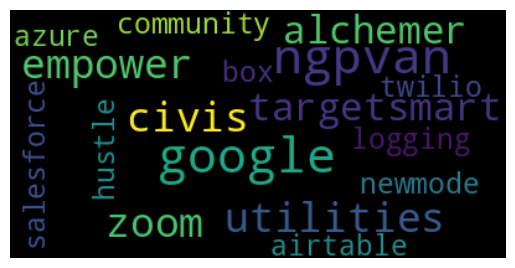

In [38]:
# wordclould with only names of parsons modules for open issues

modules = [module[0] for module in inspect.getmembers(parsons, inspect.ismodule)]

titles_unnorm = open_issues['title'].tolist()

titles = [list(set(title.lower().split())) for title in titles_unnorm] #use set because don't want repeated module name per title

titles_modules = [title_item for title in titles for title_item in title if title_item in modules ] 

titles_modules = " ".join(titles_modules)

wordcloud = WordCloud(max_font_size=40,stopwords=stopwords).generate(titles_modules)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Issues: Open Issues, Wordcloud (Other Than Parsons Modules Names)

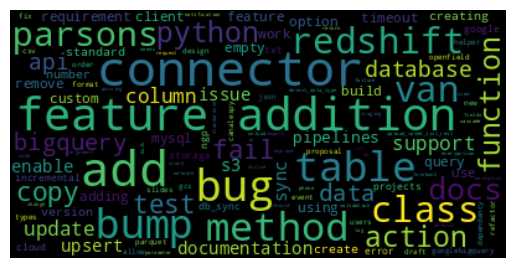

In [39]:
# wordclould with only names of *non* parsons-modules for open issues

modules = [module[0] for module in inspect.getmembers(parsons, inspect.ismodule)]

titles_unnorm = open_issues['title'].tolist()

titles = [list(set(title.lower().split())) for title in titles_unnorm] #use set because don't want repeated module name per title

titles_not_modules = [title_item for title in titles for title_item in title if title_item not in modules ] #do this for each title and then take set

stopwords = set(STOPWORDS)

titles_not_modules = " ".join(titles_not_modules)

wordcloud = WordCloud(max_font_size=40,stopwords=stopwords).generate(titles_not_modules)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Issues: Open Issues, States, Barchart

In [40]:
# Create a bar chart of the issue states
issues_counts = issues.value_counts(subset=['state'])

issues_counts = issues_counts.reset_index()

issues_counts.sort_values(by='count', ascending=False, inplace=True)

fig = px.bar(data_frame=issues_counts, x='state', y='count', title='Issue States')

fig.show()

## Issues: Issues, Body, Wordcloud

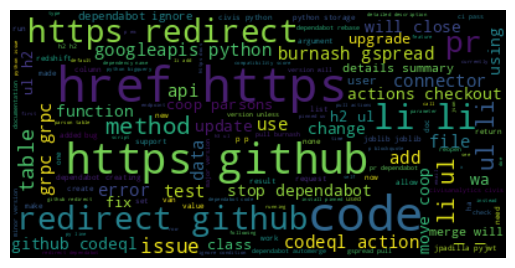

In [41]:
# analyze issues body

body = issues['body'].dropna().tolist()

body = " ".join(body)

lemma = WordNetLemmatizer()

body_lemmatized = [lemma.lemmatize(w.lower()) for w in body.split()]

body = ' '.join(body_lemmatized)

stopwords = set(STOPWORDS)

wordcloud = WordCloud(max_font_size=40,stopwords=stopwords).generate(body)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()



pass

# Code for ChatGPT summarization

Run this before doing the summarization steps below

In [42]:
# get openai api key
OPENAI_API_KEY = os.getenv('OPENAI_API_KEY')

# create openai client
client = OpenAI(api_key=OPENAI_API_KEY)


# code used for interacting with the OpenAI API
def format_message(role, content):
        return {"role": role, "content": content}


def get_response(messages, model):
    completion = client.chat.completions.create(
        model=model, 
        messages=messages,
    )
    content = completion.choices[0].message.content
    return content


# summarize each field individually--this will then be itself summarized
def summarize_fields(fields,text_field,model):

    summaries = []

    for j in range(len(fields)):
        
        instructions = f"""

        You will be provided with the {text_field} from a GitHub repository. Summarize this text in one sentence, 
        no more than half the length of the input, or 20 words, whichever is shorter. The summary should be concise and informative, 
        focusing on the key issues raised by the author. The audience for these summaries are software developers who are familiar with the project. 
        The summaries will be used to identify common issues and help developers address them more efficiently.

        Quotes: {fields[j]}
        """

        message = format_message("system", instructions) # system means high priority 
        messages = [message] # ChatGPT API expects any message to be in a list
        response = get_response(messages,model=model)
        summaries.append(response)

    summaries_df = pd.DataFrame(summaries, columns=['summaries'])

    summaries_df.to_csv('data/'+text_field+'summaries.csv', index=False)

    return summaries_df

# take the summaries of each field and summarize them
def get_summary_of_summaries(summaries,text_field,model):

    instructions = f"""

    You will be provided with your previous summaries of the {text_field} from a GitHub repository. Summarize this text in 2-3 paragraphs,
    focusing on common themes across issues. The audience for this summary of summaries are software developers who are familiar with the project. 
    The 2-3 paragraphs you produce will be used to identify common issues and help developers understand common issues facing users and developers.

    Quotes: {summaries}
    """

    summaries = format_message("system", instructions) # system means high priority 
    messages = [summaries] # ChatGPT API expects any message to be in a list
    response = get_response(messages,model=model)

    return response 



## Issues: Issues, Body, Summary

In [43]:
# summarize text in issues.body

# get body fields
fields = issues['body'].dropna().tolist()

# text field that will be inserted into the prompt: tells it what kind of data it's receiving. 
# Used in the summary-of-summaries too

text_field =  'body of an issue'

model = 'gpt-4o-mini'

summaries_df = summarize_fields(fields,text_field,model)


In [44]:
# summarize summaries of issues.body

# read in the summary of summaries 

summaries_df = pd.read_csv('data/'+text_field+'summaries.csv')

summaries_list = summaries_df['summaries'].tolist()

summaries = " ".join(summaries_list)

model = 'gpt-4o-mini'

summary = get_summary_of_summaries(summaries,text_field,model)

summary_df = pd.DataFrame([summary], columns=['summary'])

summary_df.to_csv('data/'+text_field+'summary.csv', index=False)


print(summary)

The ongoing development of the Parsons library reveals a plethora of enhancements aimed at improving user experience, dependency management, and functionality across a variety of connectors. Among the most frequently encountered issues is the challenge of maintaining compatibility with newer versions of Python and various dependency libraries, such as psycopg2, grpcio, and gspread. Developers are consistently updating these libraries to address bugs, enhance features, and ensure support for the most recent Python releases, particularly the transition from Python 3.8 to 3.11. Test failures related to package installation have been a common theme, particularly with pytest failing due to problems stemming from dependencies and improperly configured setups.

Another prevalent theme within the issues is the enhancement of existing connectors—such as integrations with ActionNetwork, Google Cloud Storage, and Redshift—through the introduction of new methods and functionality, as well as impro

## Issues: Issues, Comments, Summary

In [45]:
# summarize text in individual issues.comments

# get comments fields
fields = issues['comments'].dropna().tolist()

# text field that will be inserted into the prompt: tells it what kind of data it's receiving. 
# Used in the summary-of-summaries too

text_field =  'comments on an issue'

model = 'gpt-4o-mini'

summaries_df = summarize_fields(fields,text_field,model)




In [46]:
# summarize summaries of issues.comments

# read in the summary of summaries 

summaries_df = pd.read_csv('data/'+text_field+'summaries.csv')

summaries_list = summaries_df['summaries'].tolist()

summaries = " ".join(summaries_list)

model = 'gpt-4o-mini'

summary = get_summary_of_summaries(summaries,text_field,model)

summary_df = pd.DataFrame([summary], columns=['summary'])

summary_df.to_csv('data/'+text_field+'summary.csv', index=False)


print(summary)



The comments in the GitHub issue highlight several key themes affecting developers and users of the project. A predominant concern is the recurrence of bugs, particularly those impacting functionality and user experience. Users have reported issues related to authentication failures, inconsistent API responses, and unexpected behavior in the application, requiring urgent fixes and improvements. Contributors have suggested potential solutions and workarounds but emphasize the significance of thorough testing to prevent these bugs from affecting future releases.

Additionally, issues with documentation clarity were frequently mentioned, with developers calling for clearer instructions, examples, and standardized error handling practices. The lack of adequate documentation has been identified as a barrier to understanding the repository's functionality and usability, especially for new contributors. The comments explore various performance-related issues as well, suggesting optimizations 

## Commits: Messages, Summary

In [ ]:
# summarize text in individual commits.messages

# get comments fields
fields = commits['message'].dropna().tolist()

# text field that will be inserted into the prompt: tells it what kind of data it's receiving. 
# Used in the summary-of-summaries too

text_field =  'messages in a commit'

model = 'gpt-4o-mini'

summaries_df = summarize_fields(fields,text_field,model)


In [ ]:
# read in the summary of summaries 

summaries_df = pd.read_csv('data/'+text_field+'summaries.csv')

summaries_list = summaries_df['summaries'].tolist()

summaries = " ".join(summaries_list)

model = 'gpt-4o-mini'

summary = get_summary_of_summaries(summaries,text_field,model)

summary_df = pd.DataFrame([summary], columns=['summary'])

summary_df.to_csv('data/'+text_field+'summary.csv', index=False)


print(summary)

## Commits: Files, Counts

In [ ]:
# Create a bar chart of the commit file counts

commits = pd.read_csv('data/commits.csv')

files_lists = commits['files'].tolist()

# turn them from lists surrounded by double quotes to proper lists

files_lists = [ast.literal_eval(item) for item in files_lists]

files = [item for sublist in files_lists for item in sublist]

print(files)

df = pd.DataFrame(files, columns=['filename'])

file_counts = df.value_counts(subset=['filename'])

file_counts = file_counts.reset_index()

file_counts.sort_values(by='count', ascending=False, inplace=True)

fig = px.bar(data_frame=file_counts, x='filename', y='count', title='Commit Files')

fig.show()
